In [35]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.pipeline import Pipeline
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
df = pd.read_csv('credit_customers.csv')

In [37]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [38]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

d = 0
classi = []
for i in df.dtypes.index:
    if df.dtypes[d] == 'O' :
        classi.append(i)
    d = d + 1

for i in classi:
    df[i] = encoder.fit_transform(df[i])


In [39]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,1,6,1169.0,4,3,4.0,3,2,...,3,67.0,1,1,2.0,1,1.0,1,1,1
1,0,48.0,3,6,5951.0,2,0,2.0,0,2,...,3,22.0,1,1,1.0,1,1.0,0,1,0
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,...,3,49.0,1,1,1.0,3,2.0,0,1,1
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,...,1,45.0,1,0,1.0,1,2.0,0,1,1
4,1,24.0,2,4,4870.0,2,0,3.0,3,2,...,2,53.0,1,0,2.0,1,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12.0,3,3,1736.0,2,1,3.0,0,2,...,3,31.0,1,1,1.0,3,1.0,0,1,1
996,1,30.0,3,9,3857.0,2,0,4.0,1,2,...,1,40.0,1,1,1.0,0,1.0,1,1,1
997,3,12.0,3,6,804.0,2,3,4.0,3,2,...,0,38.0,1,1,1.0,1,1.0,0,1,1
998,1,45.0,3,6,1845.0,2,0,4.0,3,2,...,2,23.0,1,0,1.0,1,1.0,1,1,0


In [40]:
df.dtypes

checking_status             int32
duration                  float64
credit_history              int32
purpose                     int32
credit_amount             float64
savings_status              int32
employment                  int32
installment_commitment    float64
personal_status             int32
other_parties               int32
residence_since           float64
property_magnitude          int32
age                       float64
other_payment_plans         int32
housing                     int32
existing_credits          float64
job                         int32
num_dependents            float64
own_telephone               int32
foreign_worker              int32
class                       int32
dtype: object

In [41]:
df.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [42]:
df['class'].value_counts()

1    700
0    300
Name: class, dtype: int64

In [43]:
import imblearn

from imblearn.over_sampling import SMOTE

In [44]:
x = df.drop(columns = ['other_parties', 'housing', 'other_payment_plans','personal_status','property_magnitude','class'])

In [45]:
y = df['class']

<BarContainer object of 2 artists>

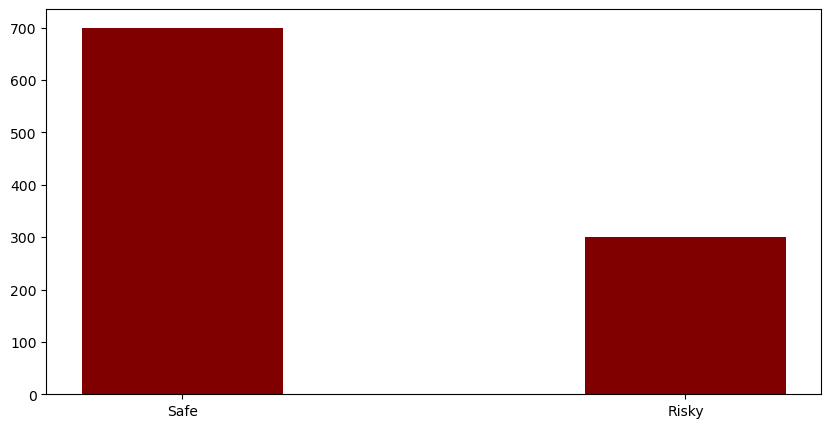

In [47]:
fig = plt.figure(figsize = (10, 5))
compare = ['Safe', 'Risky']
# creating the bar plot
plt.bar(compare, list(y.value_counts()), color ='maroon', width = 0.4)

In [49]:
ros = SMOTE(random_state=42)
x, y = ros.fit_resample(x, y)

In [50]:
y.value_counts()

1    700
0    700
Name: class, dtype: int64

<BarContainer object of 2 artists>

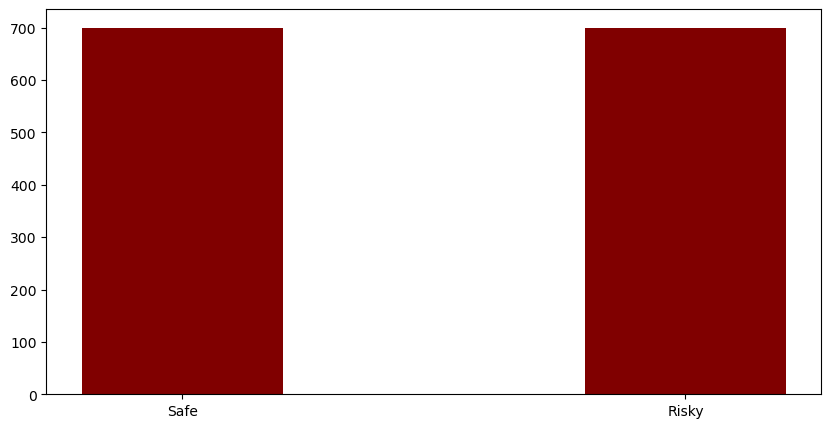

In [51]:
fig = plt.figure(figsize = (10, 5))
compare = ['Safe','Risky']
# creating the bar plot
plt.bar(compare, list(y.value_counts()), color ='maroon', width = 0.4)

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [53]:
model = XGBClassifier(
    learning_rate=0.08,
    n_estimators=150,
    max_depth=6,
)

In [54]:
model.fit(
    x_train,
    y_train,
    eval_set=[(x_test, y_test)],
    early_stopping_rounds=250,
    eval_metric='auc',
)

[0]	validation_0-auc:0.82758
[1]	validation_0-auc:0.83877
[2]	validation_0-auc:0.84326
[3]	validation_0-auc:0.85025
[4]	validation_0-auc:0.85509
[5]	validation_0-auc:0.86518
[6]	validation_0-auc:0.86708
[7]	validation_0-auc:0.87082
[8]	validation_0-auc:0.86995
[9]	validation_0-auc:0.87405
[10]	validation_0-auc:0.87802
[11]	validation_0-auc:0.88007
[12]	validation_0-auc:0.88229
[13]	validation_0-auc:0.88644
[14]	validation_0-auc:0.88726
[15]	validation_0-auc:0.88885
[16]	validation_0-auc:0.89085
[17]	validation_0-auc:0.89244
[18]	validation_0-auc:0.89367
[19]	validation_0-auc:0.89438
[20]	validation_0-auc:0.89398
[21]	validation_0-auc:0.89387


D:\anaconda\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
D:\anaconda\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.89505
[23]	validation_0-auc:0.89551
[24]	validation_0-auc:0.89618
[25]	validation_0-auc:0.90038
[26]	validation_0-auc:0.90023
[27]	validation_0-auc:0.89992
[28]	validation_0-auc:0.90161
[29]	validation_0-auc:0.90202
[30]	validation_0-auc:0.90284
[31]	validation_0-auc:0.90197
[32]	validation_0-auc:0.90253
[33]	validation_0-auc:0.90261
[34]	validation_0-auc:0.90297
[35]	validation_0-auc:0.90230
[36]	validation_0-auc:0.90220
[37]	validation_0-auc:0.90261
[38]	validation_0-auc:0.90261
[39]	validation_0-auc:0.90225
[40]	validation_0-auc:0.90307
[41]	validation_0-auc:0.90399
[42]	validation_0-auc:0.90414
[43]	validation_0-auc:0.90584
[44]	validation_0-auc:0.90594
[45]	validation_0-auc:0.90763
[46]	validation_0-auc:0.90753
[47]	validation_0-auc:0.90722
[48]	validation_0-auc:0.90732
[49]	validation_0-auc:0.90773
[50]	validation_0-auc:0.90814
[51]	validation_0-auc:0.90758
[52]	validation_0-auc:0.90788
[53]	validation_0-auc:0.90819
[54]	validation_0-auc:0.90814
[55]	valid

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [55]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

print("Accuracy: %.2f%%" % (accuracy_score(y_test, predictions) * 100.0))

Accuracy: 82.50%


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Risky','Safe']))

              precision    recall  f1-score   support

       Risky       0.80      0.84      0.82       131
        Safe       0.85      0.81      0.83       149

    accuracy                           0.82       280
   macro avg       0.82      0.83      0.82       280
weighted avg       0.83      0.82      0.83       280



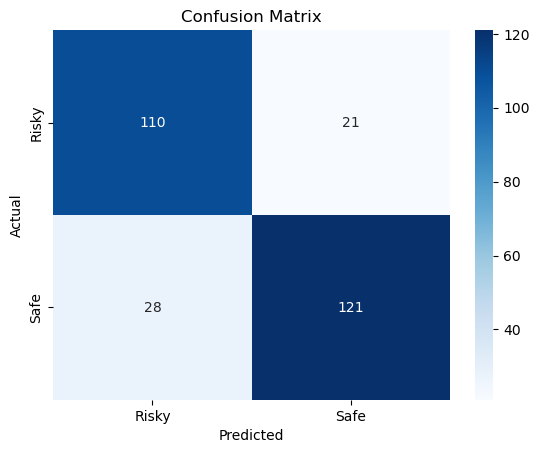

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt     

from sklearn.metrics import confusion_matrix  
cma= confusion_matrix(y_test, y_pred)  

ax= plt.subplot()
sns.heatmap(cma, annot=True, cmap=plt.cm.Blues, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Risky', 'Safe']); ax.yaxis.set_ticklabels(['Risky', 'Safe']);

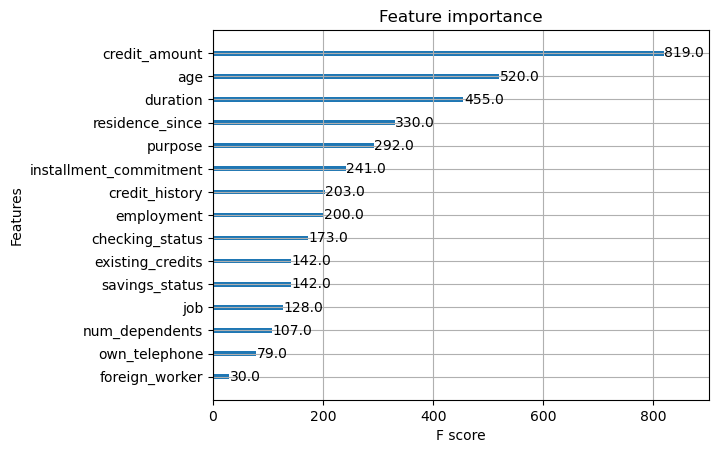

In [58]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()

In [59]:
model.save_model('xgb.json')